# TAKE HOME CHALLENGE

In [1]:
import pandas as pd
import numpy as np
import json
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# QUESTION 1 : Explory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


In [2]:
# Open and read the json file
with open('data/logins.json') as f:
    df1 = json.load(f)

In [3]:
#use pandas data frame to convert data to data frame
df_temp = pd.DataFrame(df1)

In [4]:
#Convert the login time do datetime type
df_temp['login_time'] = pd.to_datetime(df_temp.login_time)

In [5]:
#Assume our log_in time not in order, so we sorted in order and 
#Drop the reset a index to in order again
df_temp.sort_values(by = 'login_time',inplace = True)
df_temp.reset_index(inplace = True, drop = True )

In [6]:
df_temp.head(5)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [7]:
#Before I resampling our data in interval 15 min,
#I add the column count and assign 1 to it
#Then set index to login_time, now I have data frame of time series
df_temp['count'] = 1
df_temp.set_index('login_time', inplace = True)

In [8]:
#Resampling the dataframe as 15min interval and adding all the log_in
#Return the total count of each interval
new_df = df_temp.resample('15T').sum()

In [9]:
new_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
new_df.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


- Now we have total count for interval 15 min
- Data have range from 1/1/1970 to 04/13/1970
- Let plot the time series

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


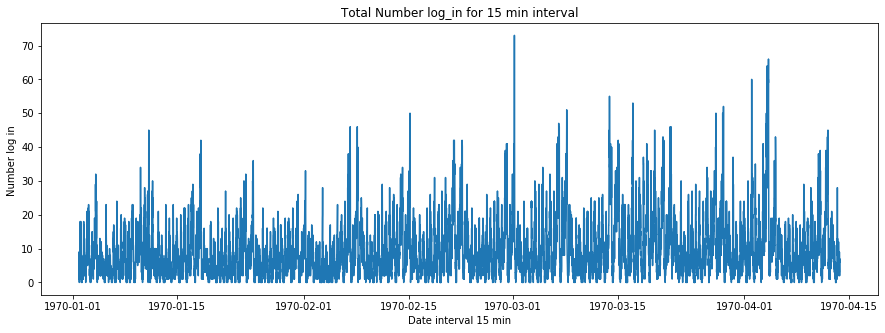

In [11]:
_ = plt.figure(figsize = (15,5))
_ = plt.plot(new_df)
_ = plt.xlabel('Date interval 15 min')
_ = plt.ylabel('Number log in ')
_ = plt.title('Total Number log_in for 15 min interval')

- The plot is too much noise, you can see little parrent, but can tell much what is it.
- So I smooth the graph little by rolling the average of 1 day, as I calculation that 1 day have 96 interval.
- So I rolling 96 and average mean of it.
- Let see the plot below

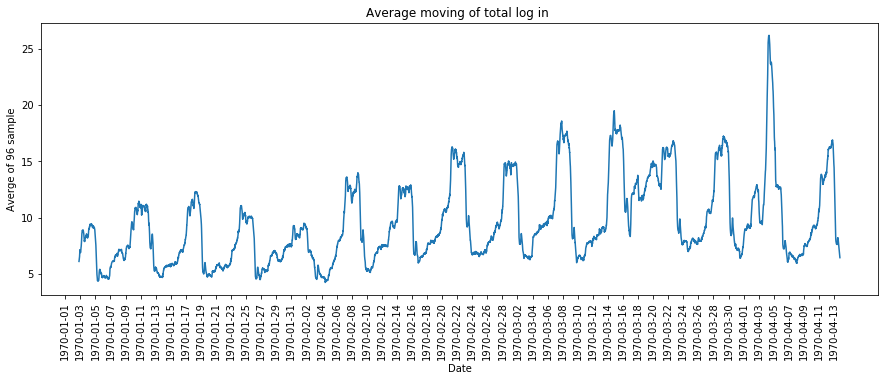

In [12]:
mean_96 = new_df['count'].rolling(96).mean()
date_index = new_df.index.strftime('%Y-%m-%d').unique()[::2]
_ = plt.figure(figsize = (15,5))
_ = plt.plot(mean_96)
_ = plt.title('Average moving of total log in ')
_ = plt.xlabel('Date')
_ = plt.ylabel('Averge of 96 sample')
_ = plt.xticks(date_index, rotation = 90)

- The average move going up and down

#### Trend Time Series

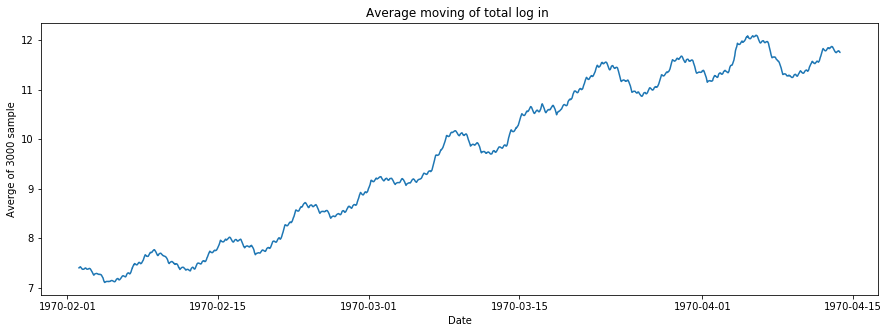

In [13]:
mean_3000 = new_df['count'].rolling(3000).mean()
#date_index = new_df.index.strftime('%Y-%m-%d').unique()[::2]
_ = plt.figure(figsize = (15,5))
_ = plt.plot(mean_3000)
_ = plt.title('Average moving of total log in ')
_ = plt.xlabel('Date')
_ = plt.ylabel('Averge of 3000 sample')
#_ = plt.xticks(date_index, rotation = 90)

- The plot show that user have increasing log in over time

# Question 2: Experienment and Design

- Problem and Statement
    - Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
    - However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

- Question 1: 
    - I would choice the number of driver active of either city at not rush time. Like how many active driver at Gotham at daytime and how many active driver of Metropolis is nightime. 
    - I choice this metric because it is can tell is that worst to begin to start my ecperienment. If number active both size to small and does't effect with my experienment so I not start this.

- Question 2: 
    1. First I got the information and total number of how many driver was active in either city.So I just sent them a short and easy survey just ask do they like to drive to another city if company offer them the toll reimbursing like yes, no or not descide. From there, I know the number of each category in survey.
    2. I collect the data at time begin the experiment and another another before the data experiment. Then hypothesis test to compare the total strip are move between each city. Then keep report to see if the we are make success or fail with our experiement
    3. With our survey data and people active of each city we can show to the city operation information that we would try this experiment. 
        

# Question 3: Predict machine model

In [14]:
with open('data/ultimate_data_challenge.json', 'r') as f:
    df2 = json.load(f)

In [15]:
raider_df = pd.DataFrame(df2)

In [16]:
raider_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
raider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
## Get the simple statictis of each column
raider_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [19]:
# checking missing value
raider_df.isna().sum().sort_values(ascending = False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
avg_dist                     0
weekday_pct                  0
ultimate_black_user          0
surge_pct                    0
last_trip_date               0
avg_surge                    0
signup_date                  0
trips_in_first_30_days       0
city                         0
dtype: int64

- the data have 50000 of user
- 8122 missing vaue avg_rating _of_driver
- 396 mising of phone, and 201 missing of avg_rating_by_drive

### Cleaning our data

In [20]:
number_column_name = raider_df.describe().columns

/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hungnguyen/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


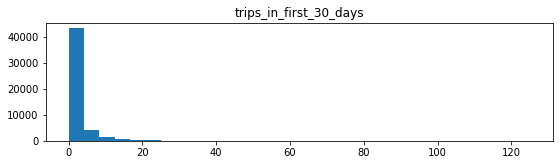

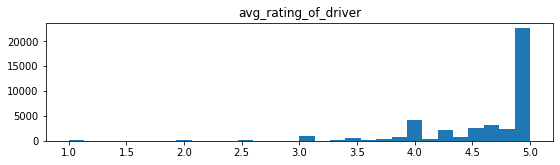

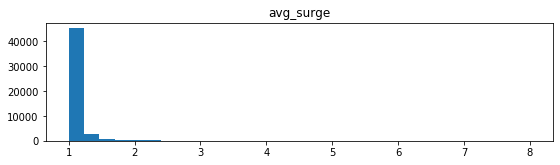

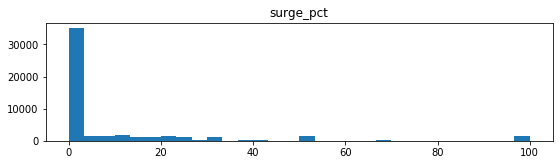

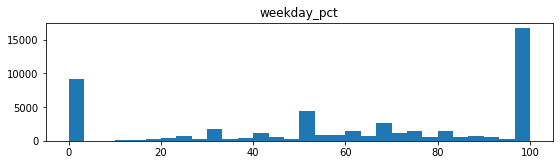

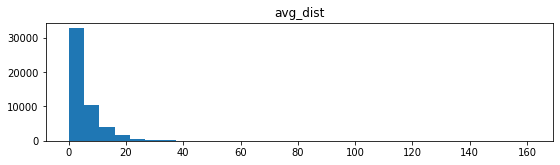

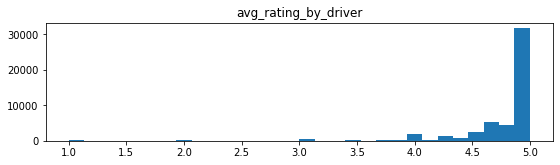

In [21]:
for i,name in enumerate(number_column_name):
    _ = plt.figure(figsize = (20,10))
    _ = plt.subplot(4,2,i+1) 
    _ = plt.hist(raider_df[name], bins = 30)
    _ = plt.title(name)

- Look at data, you can see that it either skew and the left and on the right
- And they they have some outlier too. 
- Now let remove outlier first
- Box Plot show as better with outlier

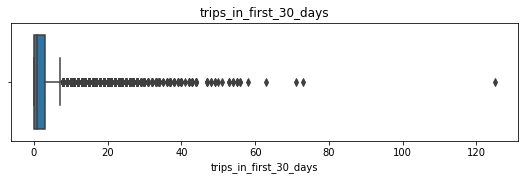

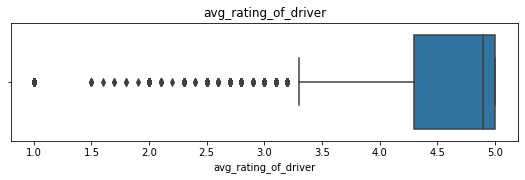

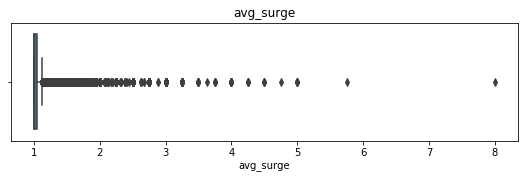

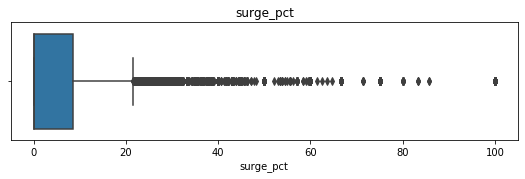

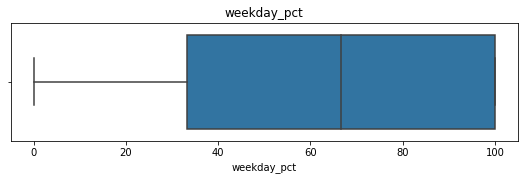

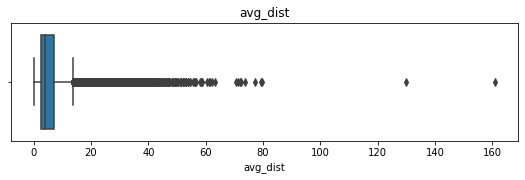

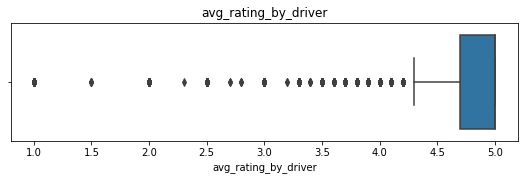

In [22]:
for i,name in enumerate(number_column_name):
    _ = plt.figure(figsize = (20,10))
    _ = plt.subplot(4,2,i+1) 
    _ = sns.boxplot(raider_df[name])
    _ = plt.title(name)

 - Boxplot easy tell us where is outlier at. So looking the graph we can get the number of outlier
 - Let assign these number on out filer to remove all the outlier

In [23]:
raider_df = raider_df[raider_df['trips_in_first_30_days'] < 10]
raider_df = raider_df[raider_df['avg_rating_of_driver'] > 3.3]
raider_df = raider_df[raider_df['avg_surge'] < 1.2]
raider_df = raider_df[raider_df['surge_pct'] < 21]
raider_df = raider_df[raider_df['avg_dist'] < 19]
raider_df = raider_df[raider_df['avg_rating_by_driver'] > 4.3]

In [24]:
raider_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27587 entries, 0 to 49997
Data columns (total 12 columns):
city                      27587 non-null object
trips_in_first_30_days    27587 non-null int64
signup_date               27587 non-null object
avg_rating_of_driver      27587 non-null float64
avg_surge                 27587 non-null float64
last_trip_date            27587 non-null object
phone                     27386 non-null object
surge_pct                 27587 non-null float64
ultimate_black_user       27587 non-null bool
weekday_pct               27587 non-null float64
avg_dist                  27587 non-null float64
avg_rating_by_driver      27587 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 2.6+ MB


In [25]:
raider_df.isna().sum().sort_values(ascending = False)

phone                     201
avg_rating_by_driver        0
avg_dist                    0
weekday_pct                 0
ultimate_black_user         0
surge_pct                   0
last_trip_date              0
avg_surge                   0
avg_rating_of_driver        0
signup_date                 0
trips_in_first_30_days      0
city                        0
dtype: int64

- After remove all the outlier, the data now have:
    -27587 row and 12 column
    - Phone number was have missing value, but I will treat it as catagory, not worry about it for now

In [26]:
#Plot number people is are retain and number people are not retain
#Assume the max last trip day is the date pull out data
#It help us to calculation the what last day they are active
max(raider_df['last_trip_date'])

'2014-07-01'

In [27]:
#Reset the index
raider_df.reset_index(drop = True, inplace = True)

In [28]:
#We need convert the last_trip_date to datatime data type
raider_df['last_trip_date'] = pd.to_datetime(raider_df['last_trip_date'])

In [29]:
#Create column with how many they are last active
max_day = max(raider_df['last_trip_date'])
raider_df['from_last_day_active'] = raider_df['last_trip_date'].apply(lambda X: (max_day - X).days)

In [30]:
#creater column with reatin user or not
#We can assign word, but just use 0 or 1 for retain user
#So we dont need convert back later
raider_df['retain_user'] = raider_df['from_last_day_active'].apply(lambda x: 1 if x < 30 else 0 )

### Data Story and visualzation

In [31]:
retain_user_df = pd.DataFrame(raider_df.groupby('retain_user')['city'].count())
retain_user_df.columns = ['Total_user']
retain_user_df

,Total_user
retain_user,
0,16637
1,10950


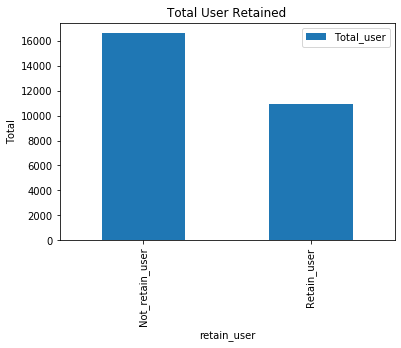

In [32]:
_ = retain_user_df.plot(kind = 'bar')
_ = plt.title('Total User Retained')
_ = plt.xticks([0,1],['Not_retain_user','Retain_user'])
_ = plt.ylabel('Total')

- Data have 16637 user are not is retain user, it mean they are not active
- And 10950 user are retain it

In [33]:
retain_user = raider_df[raider_df['retain_user'] == 1]
not_retain_user = raider_df[raider_df['retain_user'] == 0]

In [34]:
retain_user.head()


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,from_last_day_active,retain_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,25,1
9,King's Landing,0,2014-01-12,3.9,1.00,2014-07-01,iPhone,0.0,True,95.2,2.38,4.8,0,1
10,King's Landing,0,2014-01-21,5.0,1.00,2014-06-13,Android,0.0,True,100.0,7.74,5.0,18,1


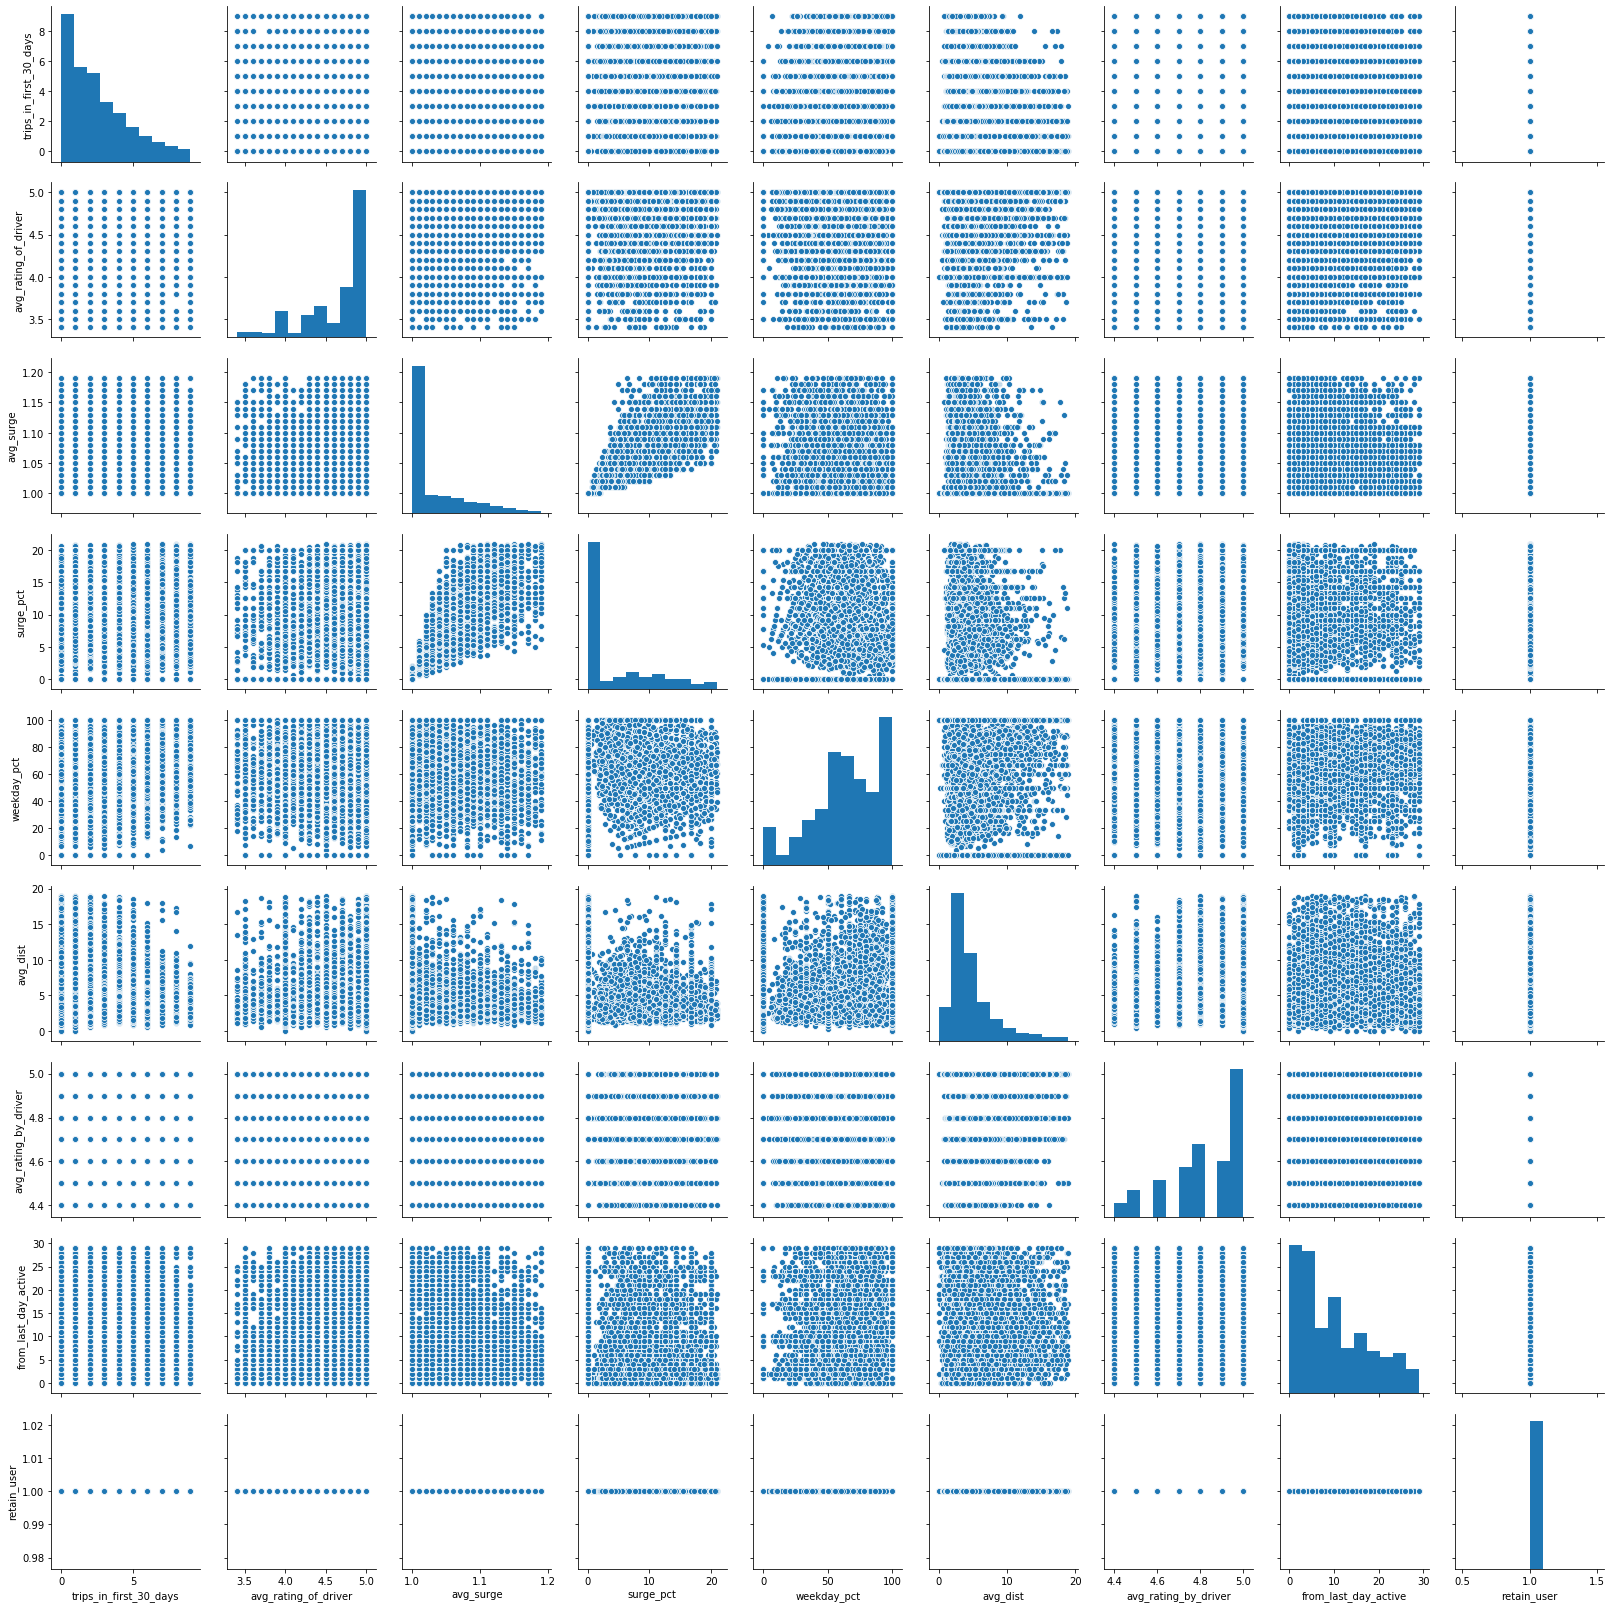

In [35]:
retain_column_name = retain_user.describe().columns
sns.pairplot(retain_user[retain_column_name])

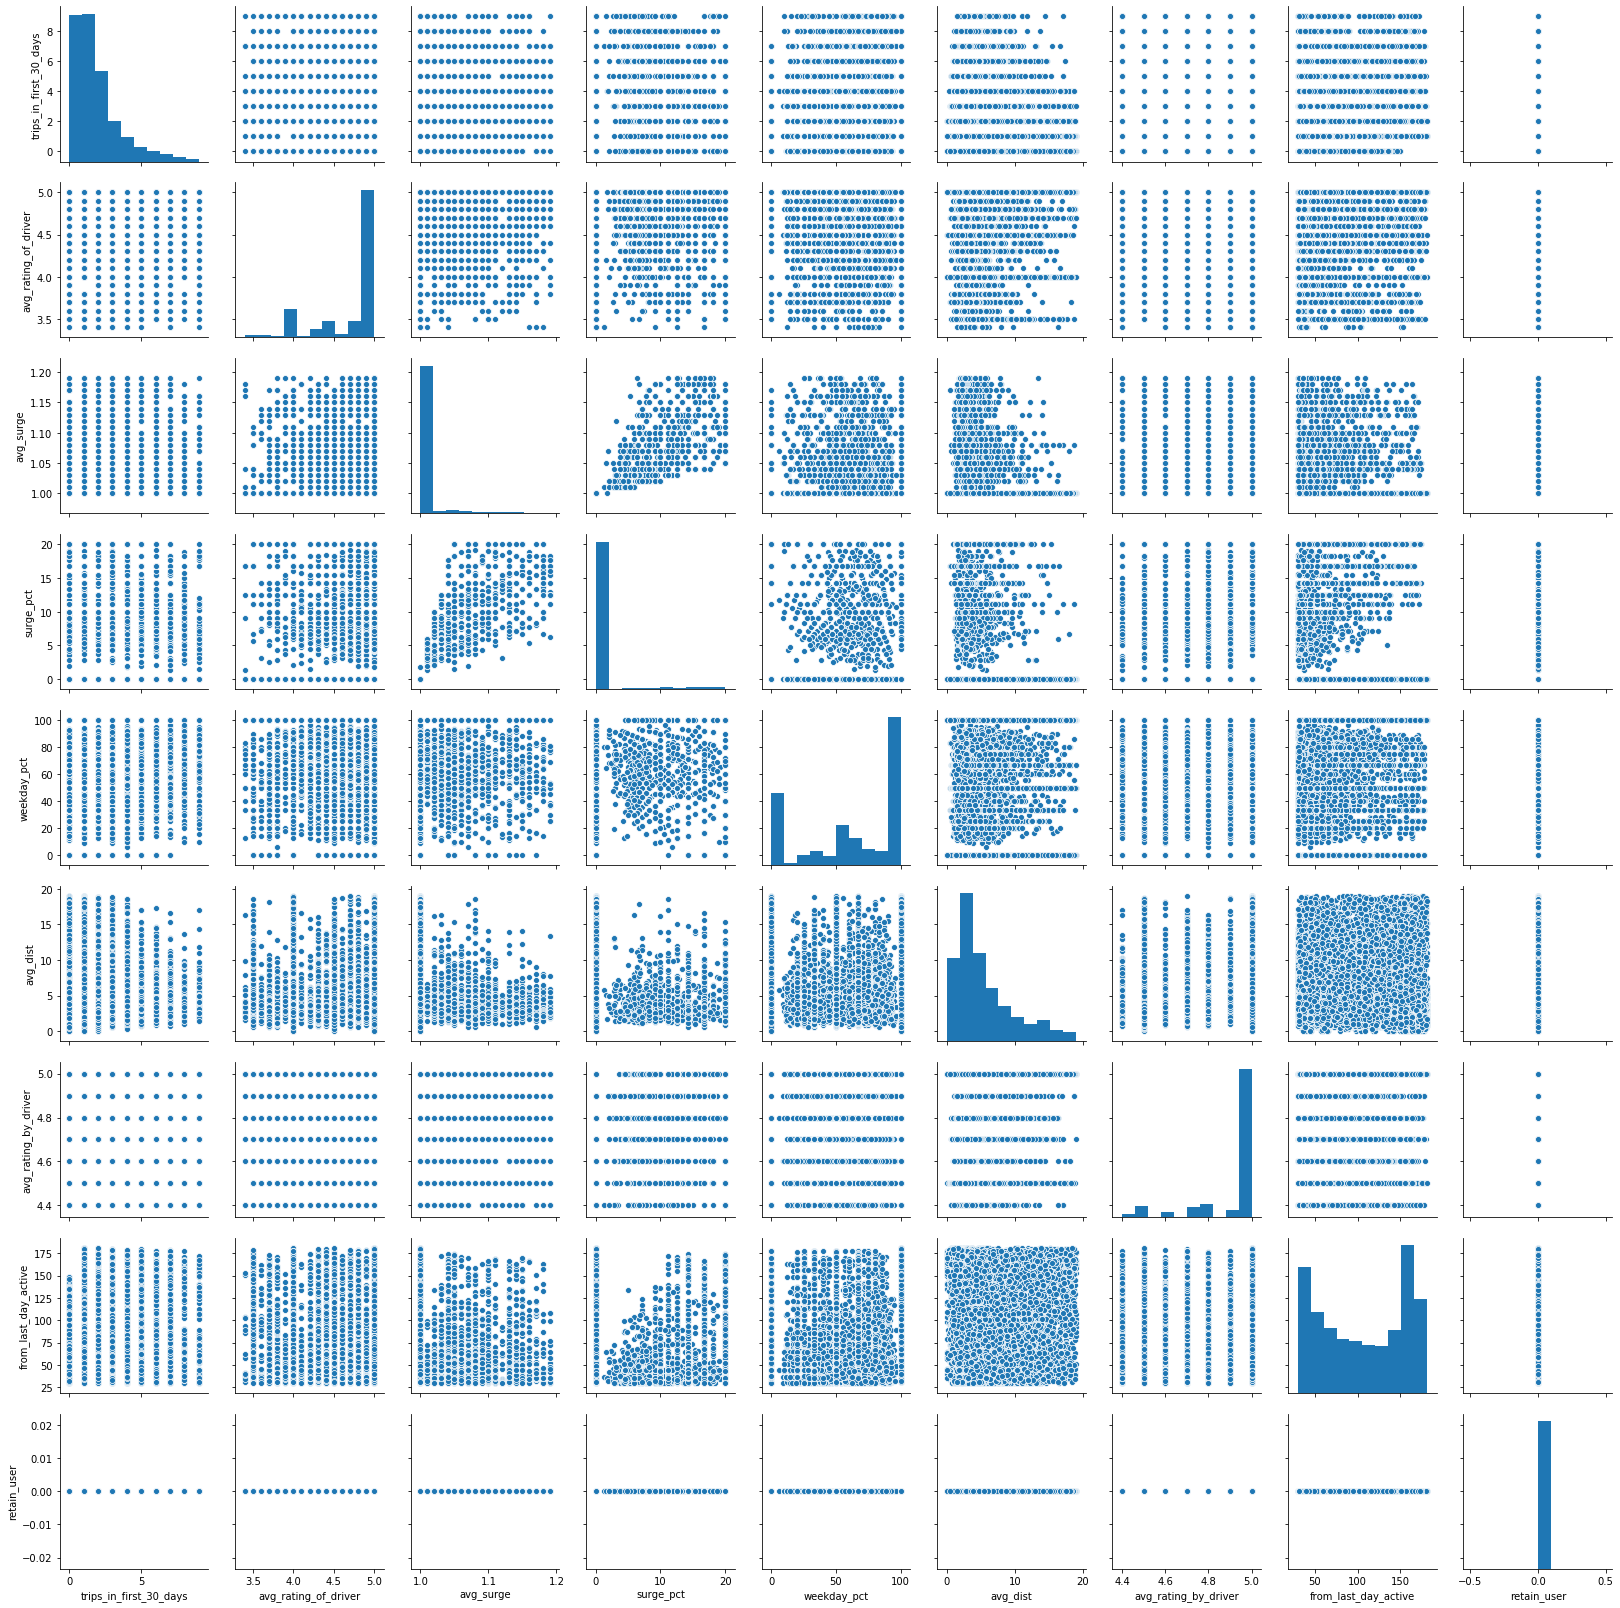

In [36]:
sns.pairplot(not_retain_user[retain_column_name])

- The pair plot show us that these column are not correaltion with each other
- As scatter plot of each column against another was random every where

### Build machine predict the retain user

- The data is so skew so let transfer to log scale, for make the data better

In [40]:
raider_df_1 = raider_df.copy()

In [41]:
raider_df_1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,from_last_day_active,retain_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,25,1


In [42]:
raider_df_1 = raider_df_1[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retain_user']]

#### Transform data to log scale for column numerical

In [43]:
raider_df_1.replace(0, 0.00000000001, inplace = True)

In [44]:
for name in number_column_name:
    raider_df_1[name] = raider_df_1[name].apply(lambda x: np.log(x))

#### Create binary number for category column

In [45]:
phone = ['iPhone', 'Android']
for i in phone:
        raider_df_1['is_' + i] = raider_df_1.phone.apply(lambda x: 1 if x == i else 0)
raider_df_1.drop('phone',axis = 1, inplace = True)

In [46]:
raider_df_1['ultimate_black_user'] = raider_df_1['ultimate_black_user'].apply(lambda x: 1 if x == True else 0)

In [47]:
raider_df_1

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain_user,is_iPhone,is_Android
0,1.386294,1.547563,0.095310,2.734368,1,3.832980,1.300192,1.609438,1.000000e+00,1,0
1,-25.328436,1.609438,0.000000,-25.328436,0,3.912023,2.111425,1.609438,1.000000e-11,0,1
2,1.098612,1.458615,0.000000,-25.328436,0,4.605170,-0.261365,1.609438,1.000000e-11,1,0
3,2.197225,1.526056,0.131028,2.995732,1,4.382027,0.858662,1.589235,1.000000e+00,1,0
4,0.693147,1.252763,0.000000,-25.328436,1,4.605170,2.357073,1.609438,1.000000e+00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
27582,-25.328436,1.609438,0.000000,-25.328436,0,4.605170,2.723267,1.609438,1.000000e-11,1,0
27583,-25.328436,1.386294,0.000000,-25.328436,0,4.605170,-0.653926,1.609438,1.000000e-11,0,1
27584,0.000000,1.504077,0.000000,-25.328436,0,3.912023,0.928219,1.609438,1.000000e+00,1,0
27585,1.098612,1.568616,0.104360,2.406945,1,4.018183,0.928219,1.547563,1.000000e+00,1,0


In [48]:
X = raider_df_1.drop('retain_user', axis = 1)
y = raider_df['retain_user']

In [49]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_iPhone,is_Android
0,1.386294,1.547563,0.095310,2.734368,1,3.832980,1.300192,1.609438,1,0
1,-25.328436,1.609438,0.000000,-25.328436,0,3.912023,2.111425,1.609438,0,1
2,1.098612,1.458615,0.000000,-25.328436,0,4.605170,-0.261365,1.609438,1,0
3,2.197225,1.526056,0.131028,2.995732,1,4.382027,0.858662,1.589235,1,0
4,0.693147,1.252763,0.000000,-25.328436,1,4.605170,2.357073,1.609438,1,0


In [50]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain, ytrain)
rfc.score(Xtest, ytest)

0.7186178567113689

In [56]:
from sklearn.metrics import classification_report
y_predict = rfc.predict(Xtest)
report = classification_report(ytest, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4963
           1       0.65      0.65      0.65      3314

    accuracy                           0.72      8277
   macro avg       0.71      0.71      0.71      8277
weighted avg       0.72      0.72      0.72      8277



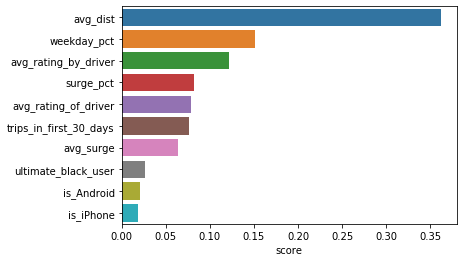

In [52]:
feature_score = pd.DataFrame(rfc.feature_importances_, index = X.columns)
feature_score.columns = ['score']
feature_score.sort_values(by='score', ascending  = False, inplace = True)
_ = sns.barplot(x = 'score', y = feature_score.index, data = feature_score)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(Xtrain,ytrain)
gbc.score(Xtest,ytest)

0.7575208408843784

In [57]:
from sklearn.metrics import classification_report
y_predict = gbc.predict(Xtest)
report = classification_report(ytest, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      4963
           1       0.73      0.62      0.67      3314

    accuracy                           0.76      8277
   macro avg       0.75      0.73      0.74      8277
weighted avg       0.76      0.76      0.75      8277



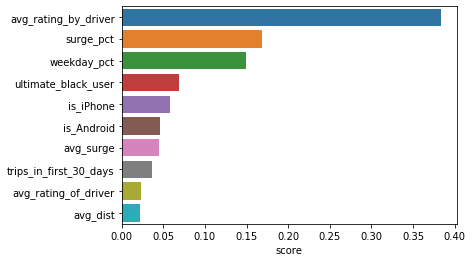

In [54]:
feature_score = pd.DataFrame(gbc.feature_importances_, index = X.columns)
feature_score.columns = ['score']
feature_score.sort_values(by='score', ascending  = False, inplace = True)
_ = sns.barplot(x = 'score', y = feature_score.index, data = feature_score)

#### Summary 

- Gradient Boosting Classifier, have the score predict is 0.75. It wasn't good but kind accept with our data.
- I will used gradient boosting for predict the user retain in future.
- The most importance feature is avg_rating_by_driver. So it can said that driver give more review likely will stay after sign up.